In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [3]:
data = pd.read_csv("data/final.csv")

data['YearMonth'] = pd.to_datetime(data['YearMonth'])
data.set_index('YearMonth', inplace=True)
data.head()

,Temperature
YearMonth,
1880-01-01,-0.36
1880-02-01,-0.51
1880-03-01,-0.23
1880-04-01,-0.30
1880-05-01,-0.06


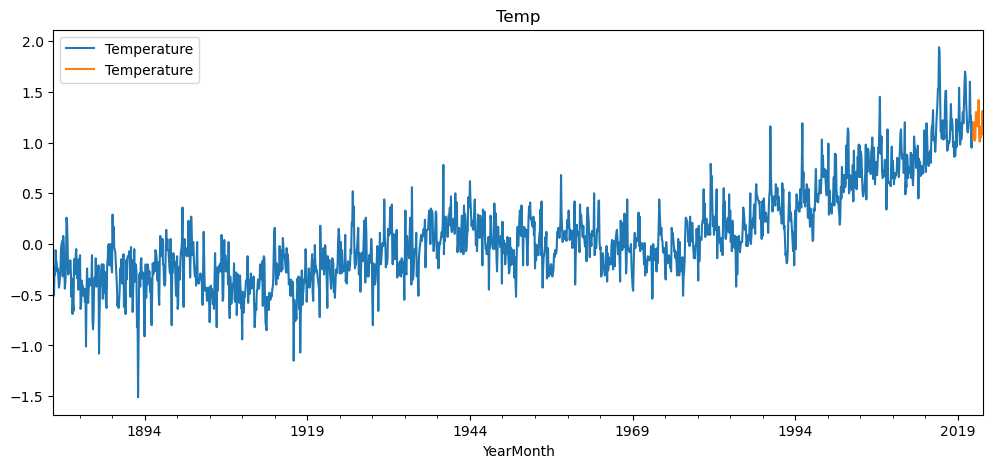

In [8]:
tst_size = 20
trn, tst = data[:-tst_size], data[-tst_size:]

ax = trn.plot(title="Temp", label='trn', figsize=(12,5))
tst.plot(label='tst', ax=ax)
plt.legend()
plt.show()

# raw data ACF, PACF

ADF Statistic: -0.5124219970406999
p-value: 0.8895695466735335
Critical Values:
	1%: -3.434223006770802
	5%: -2.8632507142793737
	10%: -2.5676807398860144


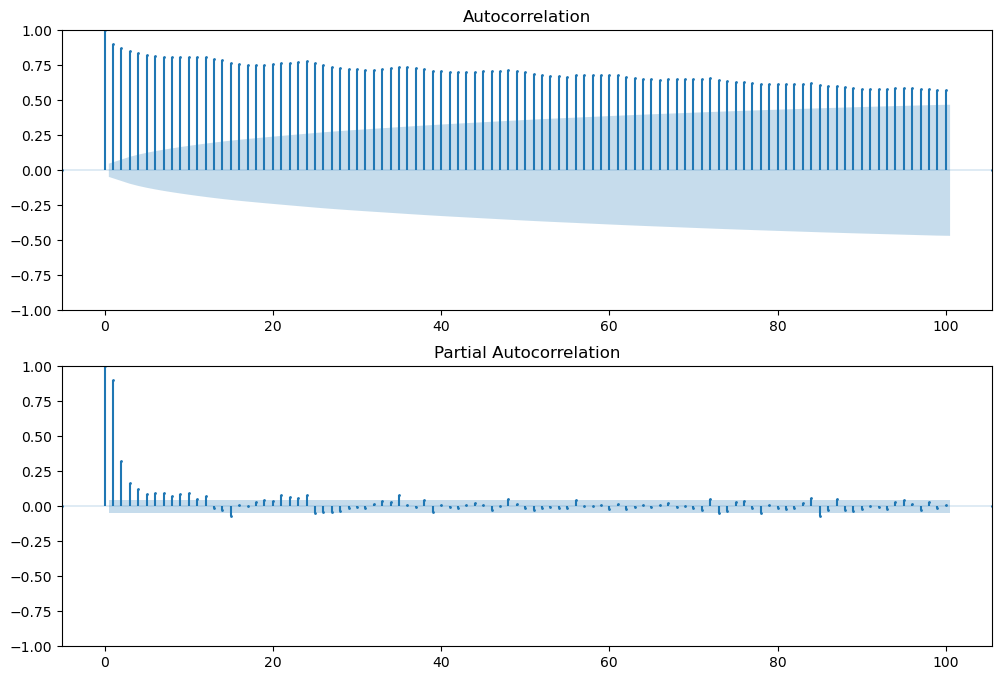

In [4]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data.values, lags=100, ax=ax1, marker='o', markersize=1,  linewidth=0.2)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data.values, lags=100, ax=ax2, marker='o', markersize=1,  linewidth=0.2)

adf = adfuller(data)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
  print('\t{}: {}'.format(key, value))

# 차분한 거 그려보기

In [5]:
data22 = data.diff(1)
data22 = data22.dropna()

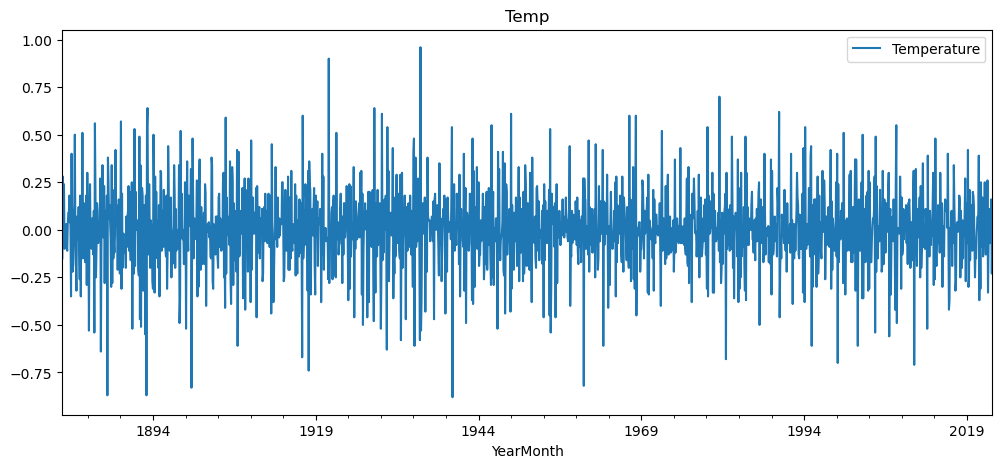

In [6]:
ax = data22.plot(title="Temp", label='trn', figsize=(12,5))
#data.plot(label='tst', ax=ax)
plt.legend()
plt.show()

ADF Statistic: -13.561858041683468
p-value: 2.301875987630388e-25
Critical Values:
	1%: -3.434223006770802
	5%: -2.8632507142793737
	10%: -2.5676807398860144


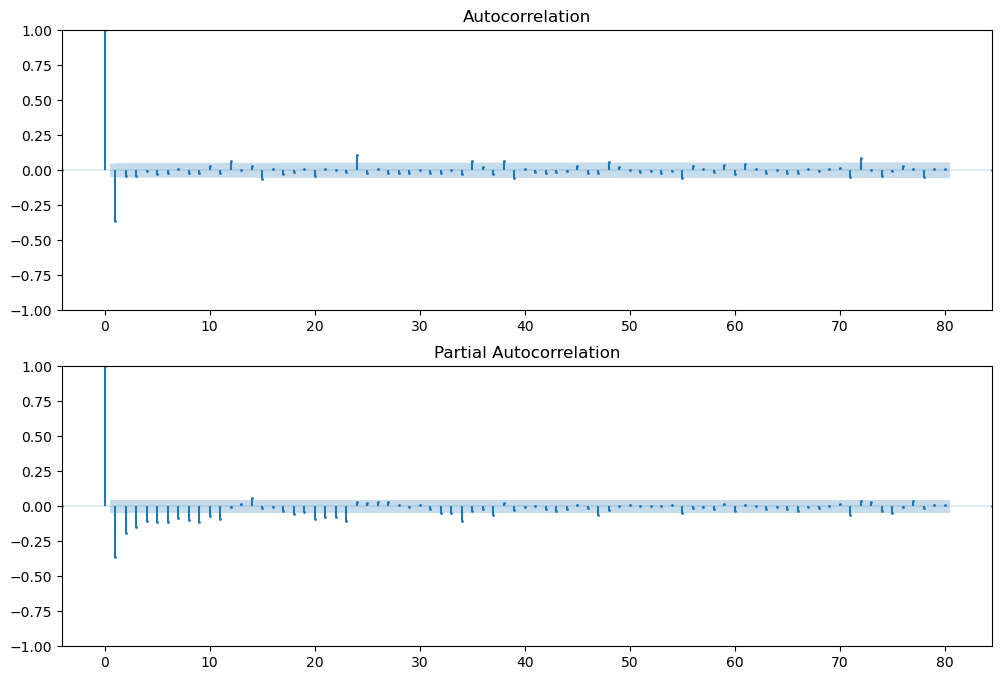

In [7]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data22.values, lags=80, ax=ax1, marker='o', markersize=1,  linewidth=0.2)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data22.values, lags=80, ax=ax2, marker='o', markersize=1,  linewidth=0.2)

adf = adfuller(data22)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
  print('\t{}: {}'.format(key, value))

- seasonal 없이 autoarima 를 돌려봤을 때
mae : 0.11250701693747737 mape : 0.1005876108867699

- sarimmodel = SARIMAX(trn, order=(1,1,2), seasonal_order=(2,0,0,12))
mae : 0.0890509910499433 mape : 0.07814764044243763

- (10,1,5) , (4,1,1) [12] 
r2:0.12

- SARIMAX(trn, order=(10,1,5), seasonal_order=(4,1,2,12))
mae : 0.08212753865511387 mape : 0.0726325378678255 r2:0.19

- (10,1,5) , (6,1,1)[12]
mae : 0.08732262247014602 mape : 0.07842405703073349 r2 : 0.03

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


sarimmodel = SARIMAX(trn, order=(10,1,5), seasonal_order=(4,1,2,12)) #P,D,Q,m  m칸 전의 p나 q를 보는 것 D는 zt = yt-y(t-m)
model_fit = sarimmodel.fit()
print(model_fit.summary())

/home/estsoft/miniconda3/envs/MathAI/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/estsoft/miniconda3/envs/MathAI/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/estsoft/miniconda3/envs/MathAI/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/estsoft/miniconda3/envs/MathAI/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.70783D-02    |proj g|=  4.11312D-01


 This problem is unconstrained.



At iterate    5    f= -2.17220D-01    |proj g|=  1.27994D-01

At iterate   10    f= -2.39938D-01    |proj g|=  1.71831D-01

At iterate   15    f= -2.66772D-01    |proj g|=  5.21439D-02

At iterate   20    f= -2.77045D-01    |proj g|=  8.09971D-02

At iterate   25    f= -2.81106D-01    |proj g|=  2.97229D-02

At iterate   30    f= -2.81778D-01    |proj g|=  4.98157D-02

At iterate   35    f= -2.82546D-01    |proj g|=  2.44848D-02

At iterate   40    f= -2.82616D-01    |proj g|=  3.78938D-03

At iterate   45    f= -2.82642D-01    |proj g|=  2.23707D-03

At iterate   50    f= -2.82779D-01    |proj g|=  6.37336D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/estsoft/miniconda3/envs/MathAI/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                         
Dep. Variable:                              Temperature   No. Observations:                 1696
Model:             SARIMAX(10, 1, 5)x(4, 1, [1, 2], 12)   Log Likelihood                 479.594
Date:                                  Tue, 02 Jan 2024   AIC                           -915.187
Time:                                          07:47:14   BIC                           -795.764
Sample:                                      01-01-1880   HQIC                          -870.954
                                           - 04-01-2021                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6589      0.687     -0.960      0.337      -2.004

In [13]:
pred = model_fit.predict("2021-05-01","2022-12-01", return_conf_int=True)
print(pred)

2021-05-01    1.062603
2021-06-01    1.088347
2021-07-01    1.049356
2021-08-01    1.071160
2021-09-01    1.117305
2021-10-01    1.173086
2021-11-01    1.233971
2021-12-01    1.204419
2022-01-01    1.298029
2022-02-01    1.318772
2022-03-01    1.383370
2022-04-01    1.254506
2022-05-01    1.173327
2022-06-01    1.143763
2022-07-01    1.115799
2022-08-01    1.133397
2022-09-01    1.164945
2022-10-01    1.225541
2022-11-01    1.290644
2022-12-01    1.214348
Freq: MS, Name: predicted_mean, dtype: float64


/home/estsoft/miniconda3/envs/MathAI/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['return_conf_int']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


mae : 0.08212753865511387 mape : 0.0726325378678255


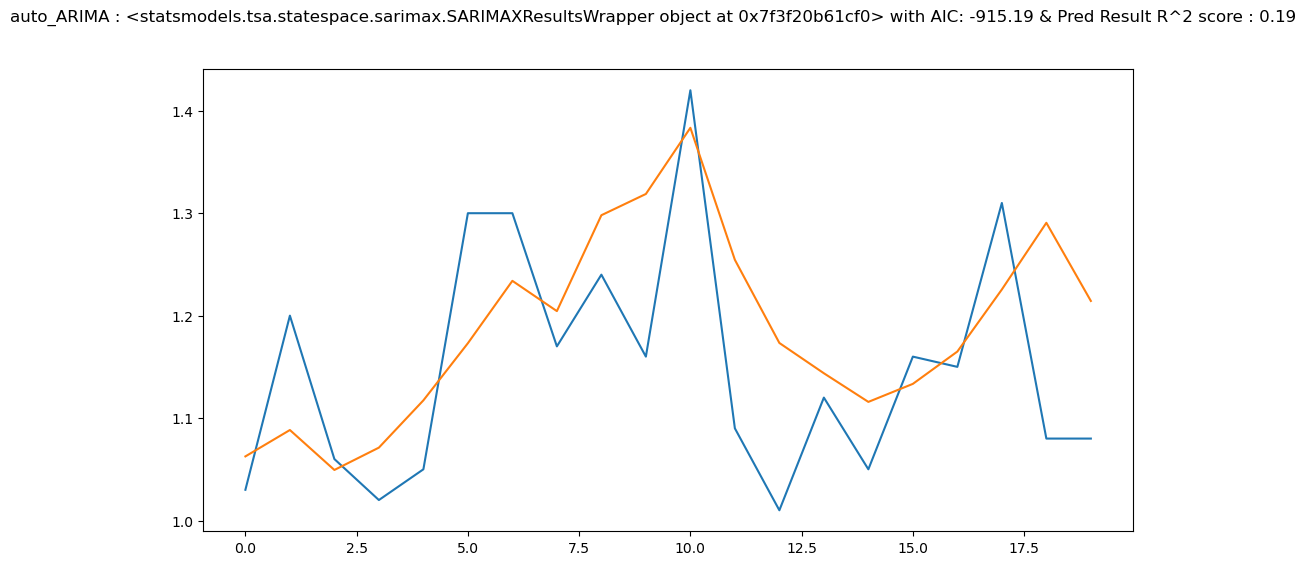

In [14]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

r2 = r2_score(tst['Temperature'], pred)
mae = mean_absolute_error(tst['Temperature'], pred)
mape = mean_absolute_percentage_error(tst['Temperature'], pred)
pred.reset_index(drop=True, inplace=True)
tst.reset_index(drop=True, inplace=True)

print("mae :" ,mae ,"mape :",mape)

fig, ax = plt.subplots(figsize=(12, 6))
tst['Temperature'].plot(label='true')
#ax.vlines('1999-08-01', 22000, 26000, linestyle='--',color='r', label='Start of Forecast')
pred.plot(label='Prediction')

#ax.legend(loc='upper left')
#plt.grid()
plt.suptitle(f'auto_ARIMA : {model_fit} with AIC: {round(model_fit.aic,2)} & Pred Result R^2 score : {round(r2, 2)}')
plt.show()